In [26]:
import os
import pandas as pd
import numpy as np
import glob
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import hashlib
import cv2
import warnings

In [4]:
df = pd.read_csv('dataset_plantdisease.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54303 entries, 0 to 54302
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Chemin          54303 non-null  object
 1   Classe          54303 non-null  object
 2   Nom_image       54303 non-null  object
 3   Largeur         54303 non-null  int64 
 4   Hauteur         54303 non-null  int64 
 5   hash            54303 non-null  object
 6   format          54303 non-null  object
 7   mode            54303 non-null  object
 8   Plante          54303 non-null  object
 9   Maladie/Statut  54303 non-null  object
dtypes: int64(2), object(8)
memory usage: 4.1+ MB


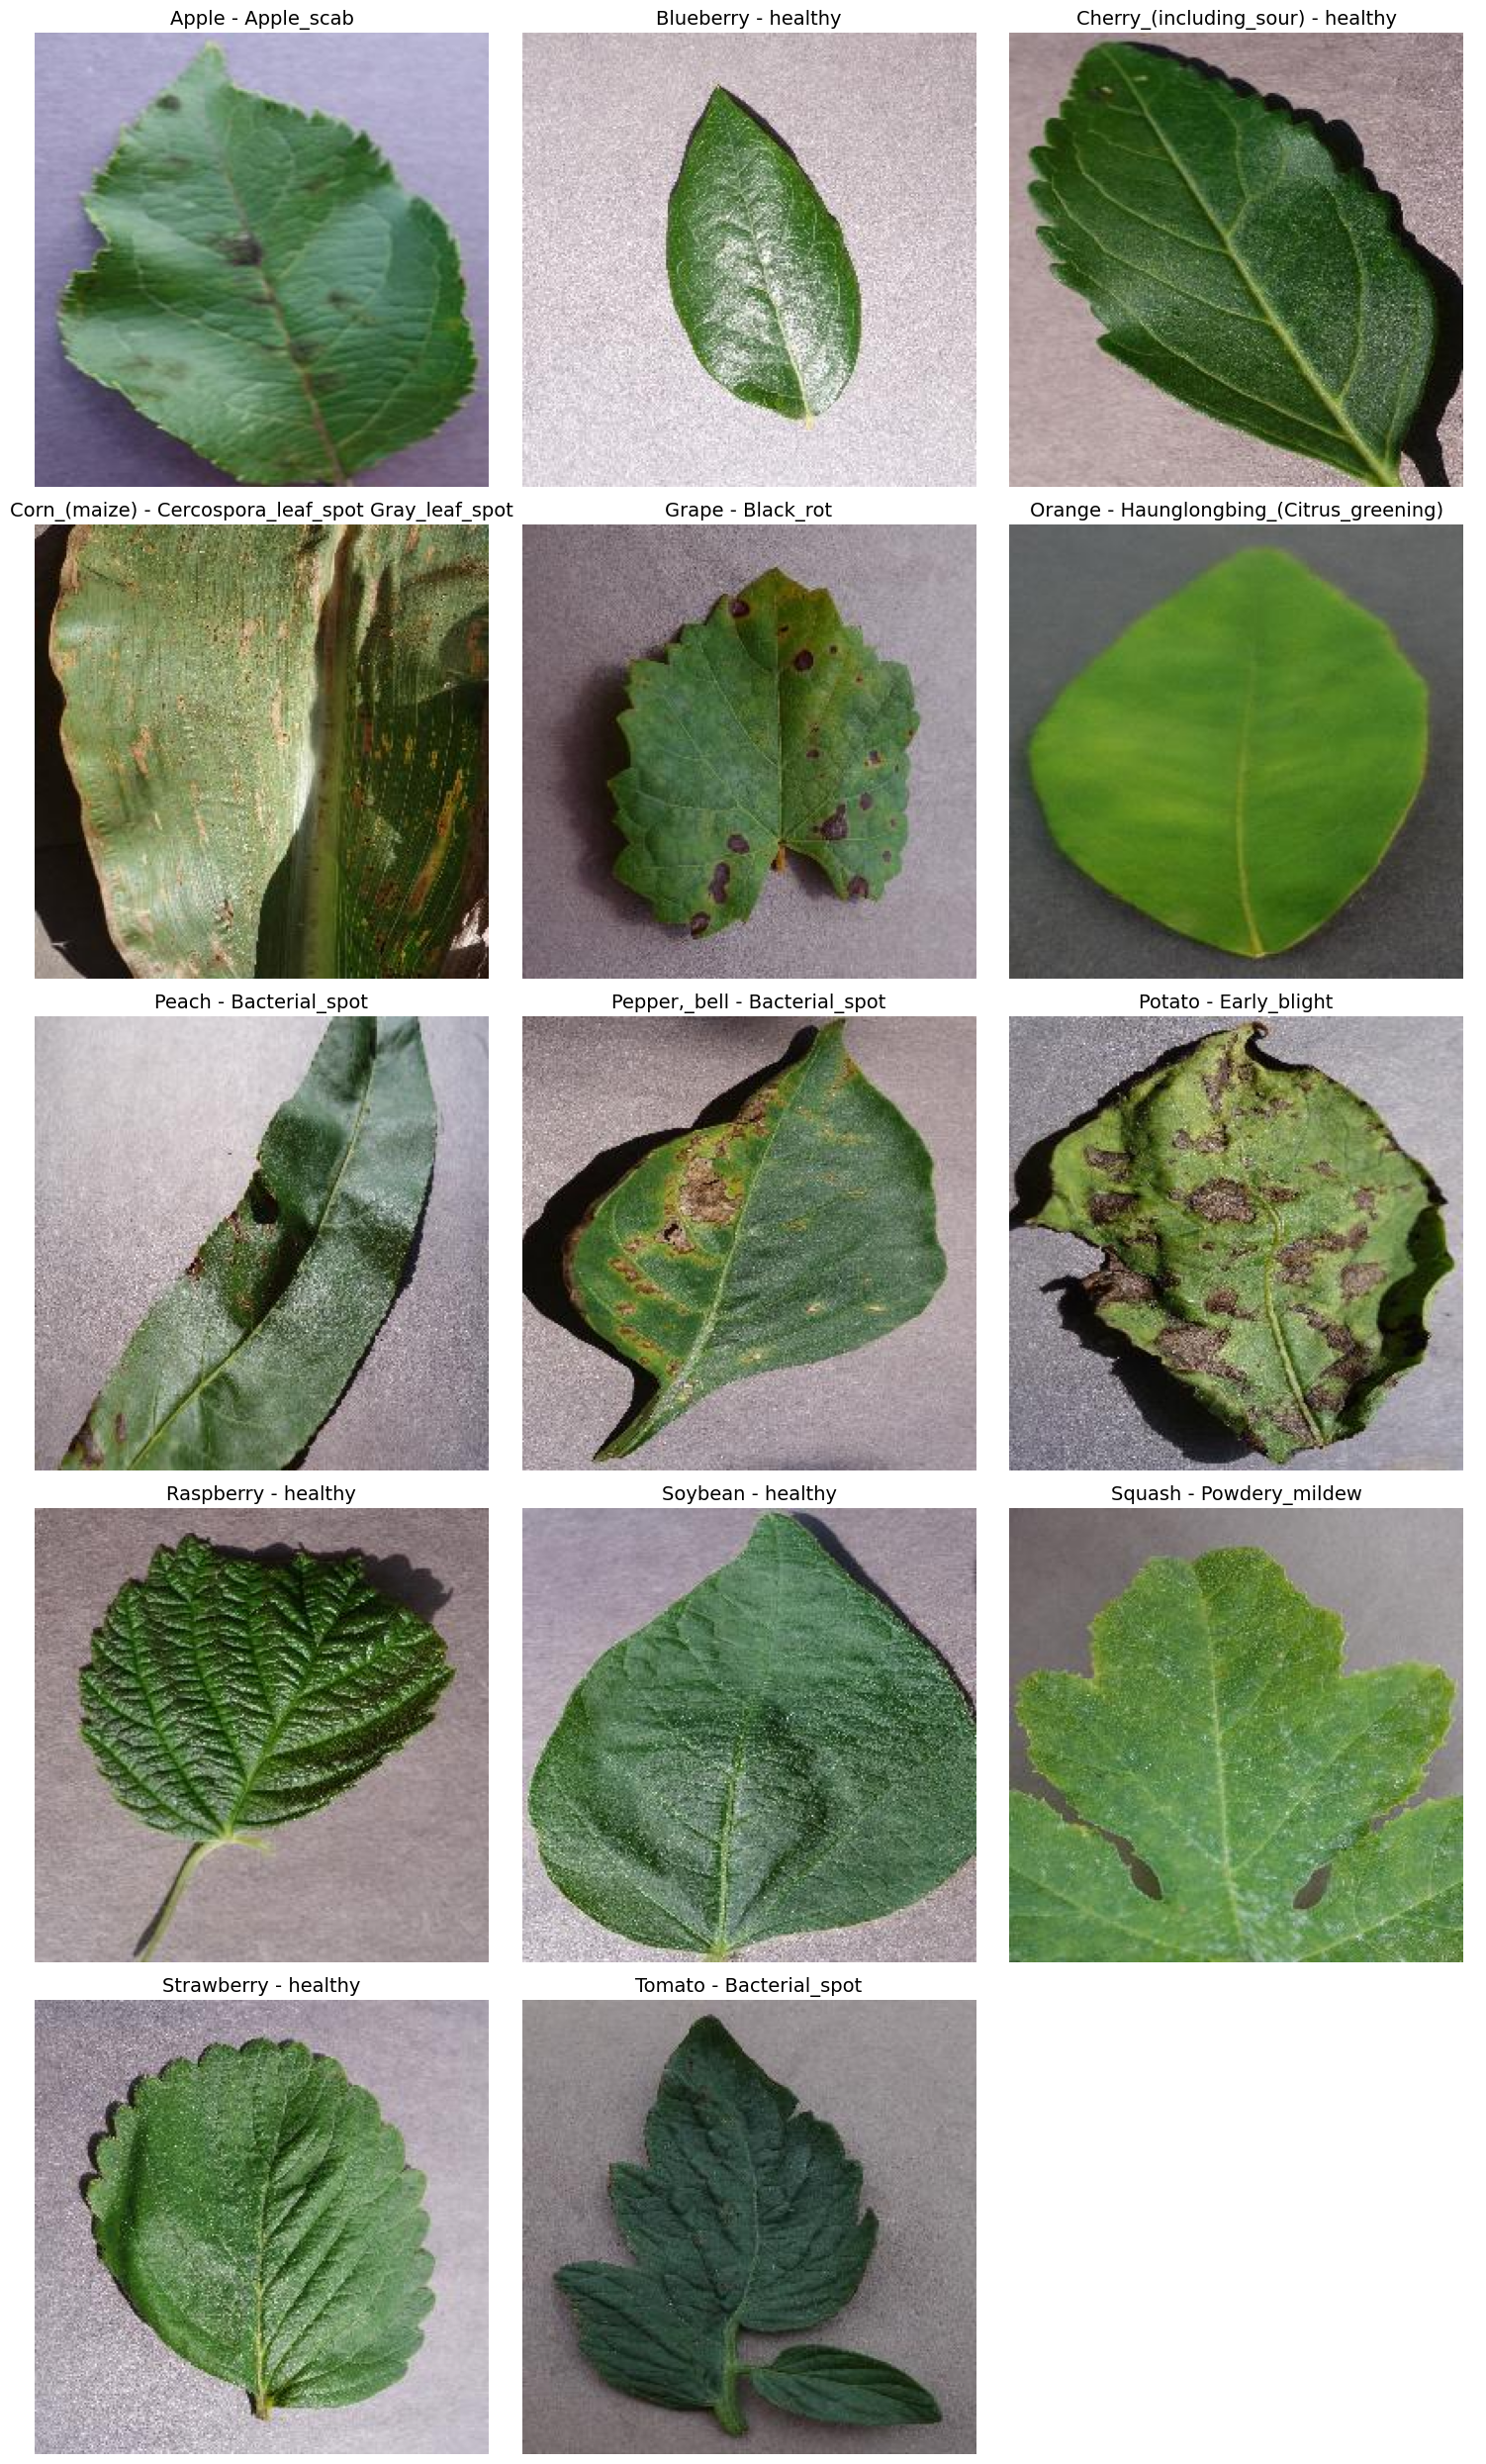

In [28]:
# Affichage d'un exemple d'image de chaque plante
warnings.filterwarnings("ignore")
# Taille des images
image_width = 5  # largeur de chaque image
image_height = 5  # hauteur de chaque image

# Créer une liste pour stocker les axes
all_axes = []

# Obtenir un exemple de chaque plante avec sa maladie associée
exemples = df.groupby('Plante').apply(lambda x: x.iloc[0])

# Calcul du nombre de plantes
num_plantes = len(exemples)

# Créer une figure avec une grille de dimensions appropriées
num_cols = 3  # Nombre de colonnes
num_rows = (num_plantes + num_cols - 1) // num_cols  # Calcul du nombre de lignes

fig, axes = plt.subplots(num_rows, num_cols, figsize=(image_width * num_cols, image_height * num_rows))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Affichage des exemples
for idx, (plante, exemple) in enumerate(exemples.iterrows()):
    row = idx // num_cols
    col = idx % num_cols
    
    chemin_image = exemple['Chemin']
    maladie = exemple['Maladie/Statut']
    
    try:
        image = Image.open(chemin_image)
        axes[row, col].imshow(image)
        axes[row, col].set_title(f"{plante} - {maladie}", fontsize=14)
        axes[row, col].axis('off')
    except FileNotFoundError:
        print(f'Image non trouvée : {chemin_image}')
    except Exception as e:
        print(f'Erreur lors de l\'ouverture de l\'image {chemin_image}: {e}')

# Supprimer les axes inutilisés
for i in range(num_plantes, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()